# GeoChem Multi Dimensional Analysis 

Those are the first tries!! Alpha  Alpha  Alpha Test

In [1]:
# Python modules
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# normality Test
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, pearsonr

from IPython.display import display
from ipywidgets import Checkbox, Dropdown, FloatRangeSlider, SelectMultiple
import pandas as pd

from termcolor import colored, cprint

# IPython Widgets
from ipyfilechooser import FileChooser

In [2]:
# Global variables
sns.set_theme()

## CSV Format

Delimiter must be ',', quote character must be "" and first column must containt field names

In [3]:
fc = FileChooser('.')
fc.title ='<b>Select csv geoChem table</b>'
fc.filter_pattern='*.csv'
fc.reset(path='.', filename= "RNGGeochem.csv")

display(fc)



FileChooser(path='D:\Users\gasato\anacondaProjects\GeoChem', filename='RNGGeochem.csv', title='<b>Select csv g…

In [10]:
print('Selected dataset to be procesed: ' + fc.selected_filename)

Selected dataset to be procesed: till_Yukon.csv


In [11]:
#Habria que incluir algún criterio de selección adicional

In [12]:
# Reading csv with Pandas and create a dataframe

df = pd.read_csv(fc.selected_filename)

# dataframe style
 
itemSel = SelectMultiple(
    options=df.columns.values,
    #value=['Oranges'],
    #rows=10,
    description='Drop Items',
    disabled=False
)

display( itemSel)


SelectMultiple(description='Drop Items', options=('OBJECTID', 'sample_no', 'notes', 'survey', 'UTM_E', 'UTM_N'…

In [22]:
dfD = df.drop(list(itemSel.value), axis=1)

display(dfD)

,Au_ppb,Au_ppm,Ag_ppm,Ag_ppb,Al_perc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_perc,Cd_ppm,Co_ppm,Cr_ppm,Cu_ppm,Fe_perc
0,-5.0,0.0,0.2,0.0,1.77,14.0,0.0,140.0,0.5,-2.0,0.18,-0.5,8.0,35.0,39.0,2.70
1,-5.0,0.0,0.2,0.0,1.75,12.0,0.0,140.0,0.5,-2.0,0.17,-0.5,8.0,34.0,36.0,2.69
2,-5.0,0.0,0.2,0.0,3.22,22.0,0.0,240.0,1.0,-2.0,0.26,-0.5,16.0,62.0,64.0,3.77
3,-5.0,0.0,-0.2,0.0,3.27,24.0,0.0,170.0,1.5,-2.0,0.26,0.5,21.0,72.0,55.0,4.43
4,-5.0,0.0,-0.2,0.0,1.21,22.0,0.0,100.0,3.5,-2.0,0.87,-0.5,27.0,36.0,82.0,7.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,-5.0,0.0,-0.2,0.0,3.17,16.0,0.0,150.0,1.0,-2.0,1.07,-0.5,18.0,61.0,69.0,4.08
135,-5.0,0.0,-0.2,0.0,2.28,10.0,0.0,140.0,0.5,-2.0,0.47,1.0,13.0,47.0,21.0,2.78
136,-5.0,0.0,-0.2,0.0,1.84,6.0,0.0,110.0,0.5,-2.0,0.23,-0.5,8.0,24.0,38.0,1.78
137,-5.0,0.0,-0.2,0.0,3.87,20.0,0.0,180.0,0.5,-2.0,0.67,-0.5,20.0,147.0,68.0,4.52


In [14]:
# Normalize columns between 0-1
# Which normalization method is the best?



In [23]:
# NORMALIZATION
# check values <0 as np.NaN
# for each row plot Normalize between 0-1

for c in dfD.columns.values:
    dfD.loc[(df[c] <= 0), c] = np.NaN
    dfD[c] = (dfD[c] - dfD[c].min())/(dfD[c].max() - dfD[c].min())
    
display(dfD) #verify NORMALIZED values

,Au_ppb,Au_ppm,Ag_ppm,Ag_ppb,Al_perc,As_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_perc,Cd_ppm,Co_ppm,Cr_ppm,Cu_ppm,Fe_perc
0,NaN,NaN,0.0,NaN,0.164706,0.285714,NaN,0.157895,0.000000,NaN,0.042654,NaN,0.000000,0.029333,0.108374,0.173585
1,NaN,NaN,0.0,NaN,0.158824,0.214286,NaN,0.157895,0.000000,NaN,0.037915,NaN,0.000000,0.026667,0.093596,0.171698
2,NaN,NaN,0.0,NaN,0.591176,0.571429,NaN,0.421053,0.166667,NaN,0.080569,NaN,0.285714,0.101333,0.231527,0.375472
3,NaN,NaN,NaN,NaN,0.605882,0.642857,NaN,0.236842,0.333333,NaN,0.080569,0.00,0.464286,0.128000,0.187192,0.500000
4,NaN,NaN,NaN,NaN,0.000000,0.571429,NaN,0.052632,1.000000,NaN,0.369668,NaN,0.678571,0.032000,0.320197,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,NaN,NaN,NaN,NaN,0.576471,0.357143,NaN,0.184211,0.166667,NaN,0.464455,NaN,0.357143,0.098667,0.256158,0.433962
135,NaN,NaN,NaN,NaN,0.314706,0.142857,NaN,0.157895,0.000000,NaN,0.180095,0.25,0.178571,0.061333,0.019704,0.188679
136,NaN,NaN,NaN,NaN,0.185294,0.000000,NaN,0.078947,0.000000,NaN,0.066351,NaN,0.000000,0.000000,0.103448,0.000000
137,NaN,NaN,NaN,NaN,0.782353,0.500000,NaN,0.263158,0.000000,NaN,0.274882,NaN,0.428571,0.328000,0.251232,0.516981


''

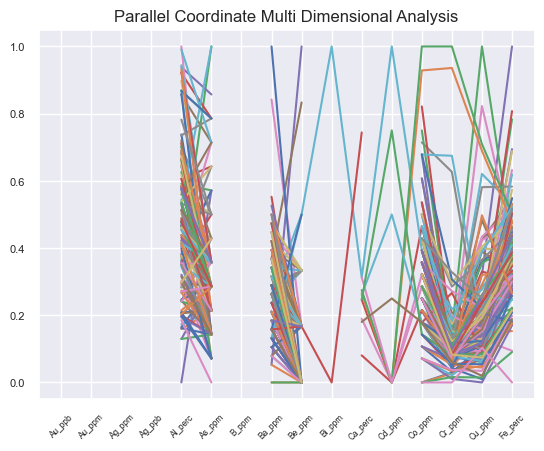

In [24]:
ncols = len(dfD.axes[1])
nrows = len(dfD.axes[0])

for r in range(nrows):
    dfD.iloc[r].plot()

    
#pd.plotting.parallel_coordinates(dfD, cols=list(dfD.columns.values), use_columns=True )

plt.title('Parallel Coordinate Multi Dimensional Analysis')
plt.xticks(range(ncols), list(dfD.columns.values), rotation=45, fontsize=6)
plt.yticks(fontsize=8)


;
